# Experiment 1: k-Shape on Raw Time Series

## Prepare the input data

- List the datasets
- List the desired contexts
- List the aggregation functions

In [2]:
import functions as func

datasets = ['BDG', 'DC']
contexts = ['weekday', 'weekend']
aggregation_functions = ['average', 'median']


In [3]:
# Load datasets

df_bdg = func.loadDataset(datasets[0])
df_dc = func.loadDataset(datasets[1])

# functions already ran, csv files can be found in data/

/Users/matias/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249

In [4]:
# Get contexts

df_weekday_BDG = func.getContext(contexts[0], df_bdg, datasets[0])
df_weekend_BDG = func.getContext(contexts[1], df_bdg, datasets[0])

df_weekday_DC = func.getContext(contexts[0], df_dc, datasets[1])
df_weekend_DC = func.getContext(contexts[1], df_dc, datasets[1])

# functions already ran, csv files can be found in data/

In [5]:
# calculate load curves based on aggregation functions

# df_average_weekday_BDG = func.doAggregation(df_weekday_BDG, contexts[0], aggregation_functions[0], 'day', datasets[0])
# df_median_weekday_BDG = func.doAggregation(df_weekday_BDG, contexts[0], aggregation_functions[1], 'day', datasets[0])
# df_average_weekend_BDG = func.doAggregation(df_weekend_BDG, contexts[1], aggregation_functions[0], 'day', datasets[0])
# df_median_weekend_BDG = func.doAggregation(df_weekend_BDG, contexts[1], aggregation_functions[1], 'day', datasets[0])

# df_average_weekday_DC = func.doAggregation(df_weekday_DC, contexts[0], aggregation_functions[0], 'day', datasets[1])
# df_median_weekday_DC = func.doAggregation(df_weekday_DC, contexts[0], aggregation_functions[1], 'day', datasets[1])
# df_average_weekend_DC = func.doAggregation(df_weekend_DC, contexts[1], aggregation_functions[0], 'day', datasets[1])
# df_median_weekend_DC = func.doAggregation(df_weekend_DC, contexts[1], aggregation_functions[1], 'day', datasets[1])

# functions already ran, csv files can be found in data/

In [9]:
# loading files since they have already been generated before

import pandas as pd

df_average_weekday_BDG = pd.read_csv('data/BDG_loadCurves_weekday_day_average.csv', index_col=0)
df_median_weekday_BDG = pd.read_csv('data/BDG_loadCurves_weekday_day_median.csv', index_col=0)
df_average_weekend_BDG = pd.read_csv('data/BDG_loadCurves_weekend_day_average.csv', index_col=0)
df_median_weekend_BDG = pd.read_csv('data/BDG_loadCurves_weekend_day_median.csv', index_col=0)

df_average_weekday_DC = pd.read_csv('data/DC_loadCurves_weekday_day_average.csv', index_col=0)
df_median_weekday_DC = pd.read_csv('data/DC_loadCurves_weekday_day_median.csv', index_col=0)
df_average_weekend_DC = pd.read_csv('data/DC_loadCurves_weekend_day_average.csv', index_col=0)
df_median_weekend_DC = pd.read_csv('data/DC_loadCurves_weekend_day_median.csv', index_col=0)


In [11]:
# group dataframes

dataframes = [df_average_weekday_BDG, df_median_weekday_BDG, df_average_weekend_BDG, df_median_weekend_BDG, 
             df_average_weekday_DC, df_median_weekday_DC, df_average_weekend_DC, df_median_weekend_DC]

## Download k-Shape library (and other needed libraries)

First from: https://github.com/Mic92/kshape and also from: https://tslearn.readthedocs.io/en/latest/auto_examples/plot_kshape.html#

In [10]:
from kshape.core import kshape, zscore

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.plotly as py

from scipy.spatial.distance import cdist
from collections import Counter

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import KShape

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import pairwise_distances

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


## Run k-Shape algorithm


Observations from the github repo:
- If the data is available from different sources with same frequency but at different points in time, it needs to be aligned.
- kshape also expect no time series with a constant observation value or 'N/A'

Distance measure: normalized cross-correlation measure (consider the shape while comparing them)

In [14]:
# get rid of building ID

print(dataframes[0])
dataframe1 = TimeSeriesScalerMeanVariance().fit_transform(np.squeeze(dataframes[0].values))
# dataFrame.values will generate a 3d array (the third dimension being 1) so we convert it to a 2d array
dataframe1 = np.squeeze(dataframe1) # now is a 2d array
print("Shape of X matrix: {}".format(dataframe1.shape))

sz = dataframe1.shape[1]

seed = 3
max_iter = 500
k = 5
ks = KShape(n_clusters=k, verbose=True, random_state=seed, max_iter=max_iter)
y_pred = ks.fit_predict(dataframe1)

plt.figure(figsize=(18,10))
for yi in range(k):
    plt.subplot(k, 1, 1 + yi)
    for xx in dataframe1[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

# plt.tight_layout()
plt.show()

              Unnamed: 0            0            1            2            3  \
0        Office_Cristina     2.914504     2.800169     2.679093     2.615770   
1        PrimClass_Jolie     0.429207     0.439657     0.456881     0.483383   
2       PrimClass_Jaylin     1.191497     1.201627     1.226016     1.213201   
3           Office_Jesus     1.641835     1.622900     1.645334     1.619430   
4        PrimClass_Jayla     1.952623     1.984275     2.119775     2.179145   
5       PrimClass_Janiya     2.329685     2.323776     2.259107     2.235651   
6       PrimClass_Janice     1.595606     1.613235     1.604418     1.665574   
7            Office_Jett     1.023614     0.978011     0.984447     0.984121   
8           UnivLab_Paul    88.985490    88.106579    86.806741    84.541450   
9           Office_Jerry     2.703048     2.710953     2.734800     2.704317   
10           Office_Lesa     7.357237     7.341271     7.367426     7.305704   
11      UnivDorm_Claudia    21.307489   

ValueError: could not convert string to float: 'Office_Cristina'

## Evaluation:

### Evaluate resulting clusters with sillouhette coefficient plot

0.187 --> 0.168 --> 0.165 --> 0.166 --> 
For k = 2. The average silhouette_score is : 0.11100528588323248.
0.175 --> 0.146 --> 0.140 --> 0.135 --> 0.132 --> 0.131 --> 0.139 --> 
For k = 3. The average silhouette_score is : 0.14554646727504886.
0.180 --> 0.153 --> 0.141 --> 0.138 --> 0.134 --> 0.131 --> 0.129 --> 0.127 --> 0.126 --> 0.125 --> 0.124 --> 0.123 --> 0.122 --> 0.121 --> 0.121 --> 0.121 --> 0.121 --> 0.120 --> 0.120 --> 0.120 --> 0.120 --> 
For k = 4. The average silhouette_score is : 0.10671116776238278.
0.146 --> 0.125 --> 0.119 --> 0.113 --> 0.108 --> 0.102 --> 0.108 --> 
For k = 5. The average silhouette_score is : 0.14122774903265298.
0.155 --> 0.124 --> 0.111 --> 0.102 --> 0.093 --> 0.090 --> 0.096 --> 
For k = 6. The average silhouette_score is : 0.13198803823336736.


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



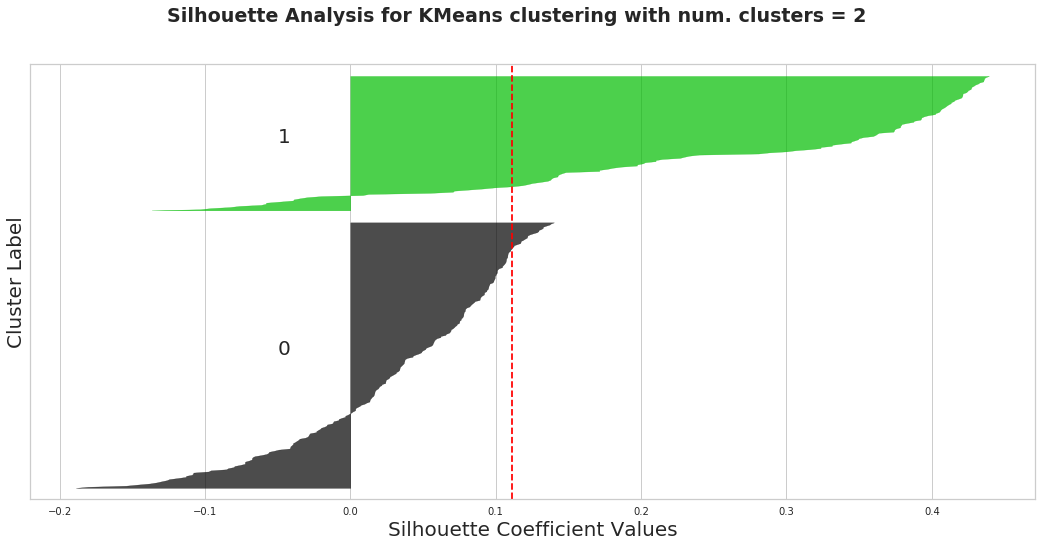

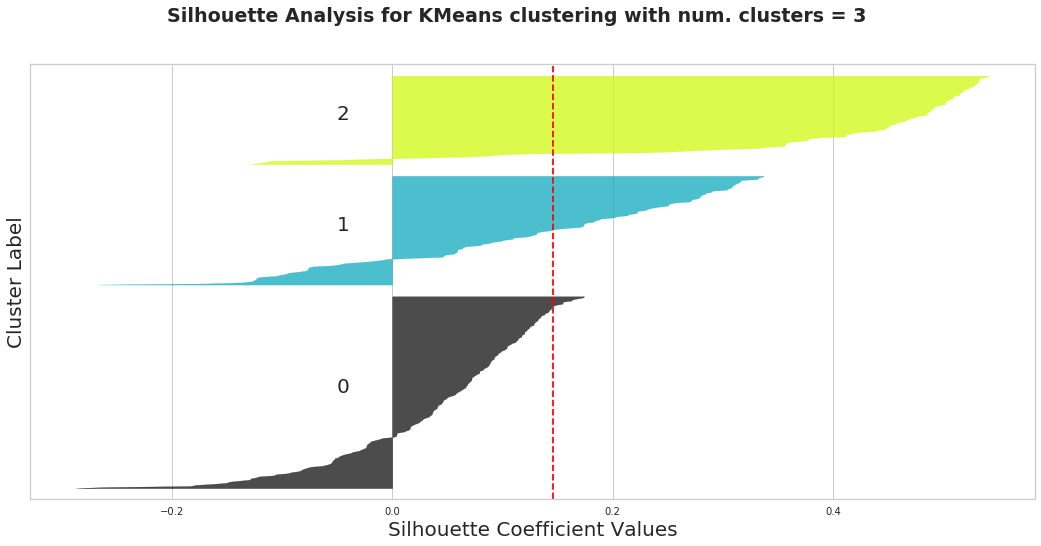

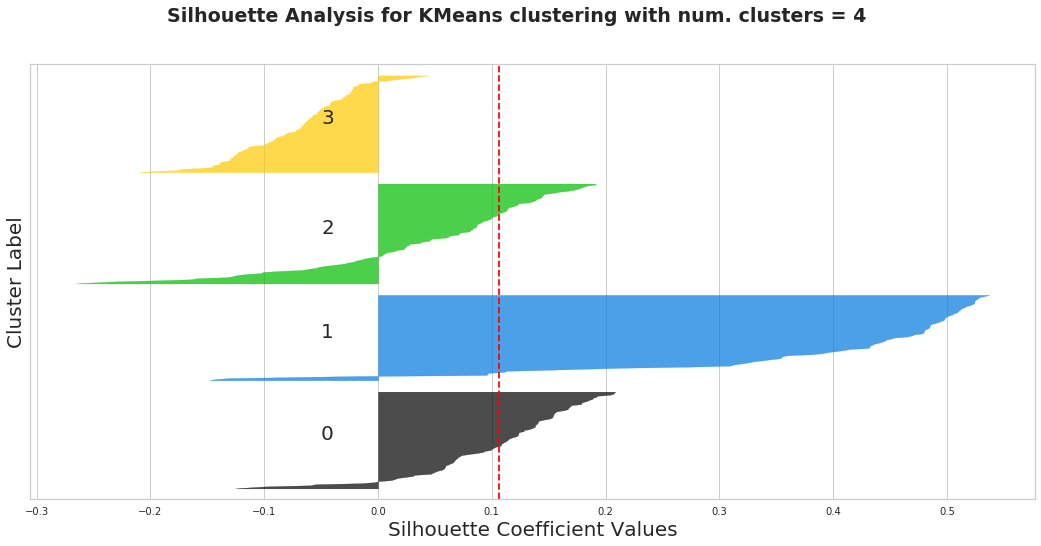

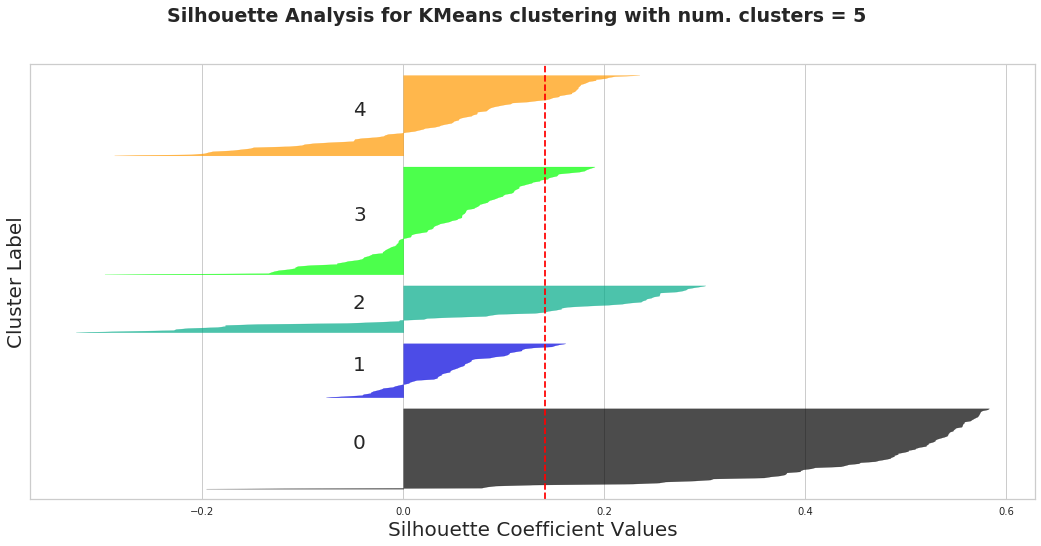

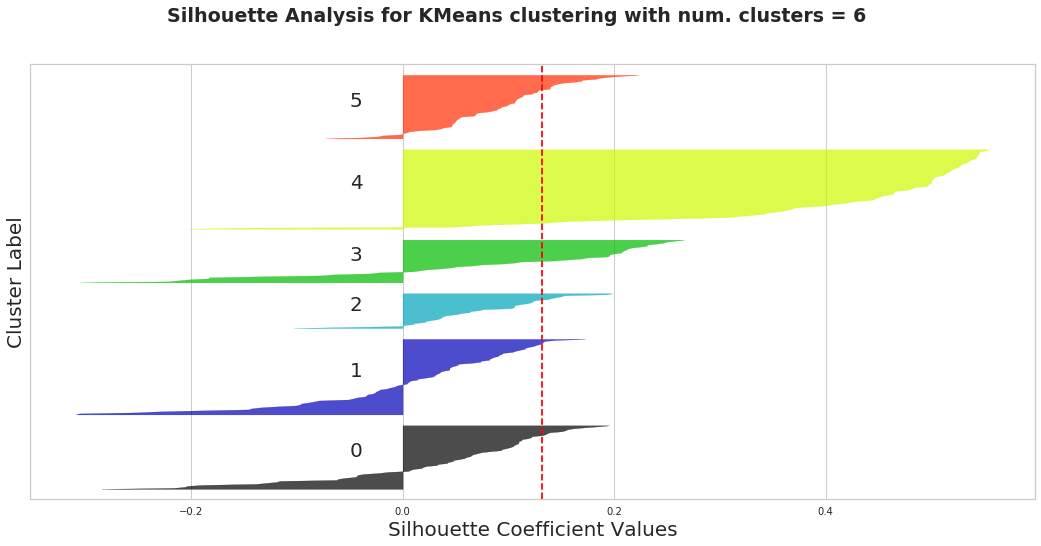

In [11]:
rangeK = [2, 3, 4, 5, 6] # values of K-clusters to test
seed = 3 # random seed for reproducibility
max_iter = 500

plotSilhouettes(weekday_X_train, rangeK, seed, max_iter)


0.146 --> 0.125 --> 0.119 --> 0.113 --> 0.108 --> 0.102 --> 0.108 --> 


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



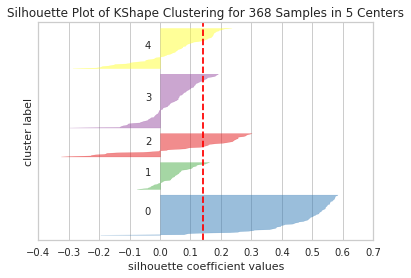

In [7]:
# using library for silhouettes (http://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)

# Instantiate the clustering model and visualizer
model = KShape(n_clusters=5, verbose=True, random_state=seed)

visualizer = SilhouetteVisualizer(model)

visualizer.fit(weekday_X_train) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

### Evaluate resulting clusters with elbow method

#### distortion metric: mean sum of squared distances to centers

0.187 --> 0.168 --> 0.165 --> 0.166 --> 
0.175 --> 0.146 --> 0.140 --> 0.135 --> 0.132 --> 0.131 --> 0.139 --> 
0.180 --> 0.153 --> 0.141 --> 0.138 --> 0.134 --> 0.131 --> 0.129 --> 0.127 --> 0.126 --> 0.125 --> 0.124 --> 0.123 --> 0.122 --> 0.121 --> 0.121 --> 0.121 --> 0.121 --> 0.120 --> 0.120 --> 0.120 --> 0.120 --> 
0.146 --> 0.125 --> 0.119 --> 0.113 --> 0.108 --> 0.102 --> 0.108 --> 
0.155 --> 0.124 --> 0.111 --> 0.102 --> 0.093 --> 0.090 --> 0.096 --> 
0.163 --> 0.123 --> 0.112 --> 0.106 --> 0.104 --> 0.102 --> 0.101 --> 0.100 --> 0.099 --> 0.099 --> 0.100 --> 
0.143 --> 0.117 --> 0.102 --> 0.096 --> 0.093 --> 0.092 --> 0.091 --> 0.091 --> 0.090 --> 0.090 --> 0.090 --> 
0.157 --> 0.110 --> 0.096 --> 0.089 --> 0.084 --> 0.080 --> 0.078 --> 0.078 --> 


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



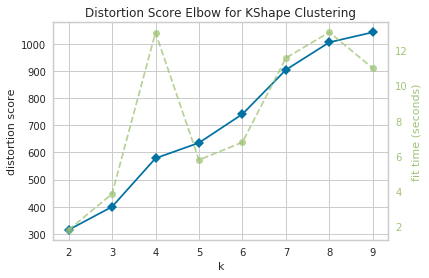

In [14]:
# using library (http://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

# Instantiate the clustering model and visualizer
model = KShape(random_state=seed,max_iter=max_iter)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')

visualizer.fit(weekday_X_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


####  silhouette: mean ratio of intra-cluster and nearest-cluster distance

0.187 --> 0.168 --> 0.165 --> 0.166 --> 
0.175 --> 0.146 --> 0.140 --> 0.135 --> 0.132 --> 0.131 --> 0.139 --> 
0.180 --> 0.153 --> 0.141 --> 0.138 --> 0.134 --> 0.131 --> 0.129 --> 0.127 --> 0.126 --> 0.125 --> 0.124 --> 0.123 --> 0.122 --> 0.121 --> 0.121 --> 0.121 --> 0.121 --> 0.120 --> 0.120 --> 0.120 --> 0.120 --> 
0.146 --> 0.125 --> 0.119 --> 0.113 --> 0.108 --> 0.102 --> 0.108 --> 
0.155 --> 0.124 --> 0.111 --> 0.102 --> 0.093 --> 0.090 --> 0.096 --> 
0.163 --> 0.123 --> 0.112 --> 0.106 --> 0.104 --> 0.102 --> 0.101 --> 0.100 --> 0.099 --> 0.099 --> 0.100 --> 
0.143 --> 0.117 --> 0.102 --> 0.096 --> 0.093 --> 0.092 --> 0.091 --> 0.091 --> 0.090 --> 0.090 --> 0.090 --> 
0.157 --> 0.110 --> 0.096 --> 0.089 --> 0.084 --> 0.080 --> 0.078 --> 0.078 --> 


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



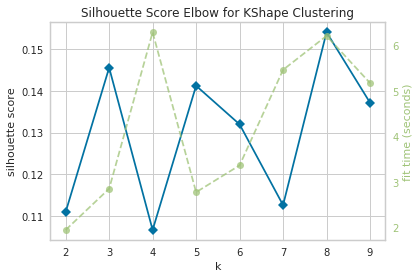

In [15]:
# using library (http://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

# Instantiate the clustering model and visualizer
model = KShape(random_state=seed,max_iter=max_iter)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(weekday_X_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


#### calinski_harabaz: ratio of within to between cluster dispersion

0.187 --> 0.168 --> 0.165 --> 0.166 --> 
0.175 --> 0.146 --> 0.140 --> 0.135 --> 0.132 --> 0.131 --> 0.139 --> 
0.180 --> 0.153 --> 0.141 --> 0.138 --> 0.134 --> 0.131 --> 0.129 --> 0.127 --> 0.126 --> 0.125 --> 0.124 --> 0.123 --> 0.122 --> 0.121 --> 0.121 --> 0.121 --> 0.121 --> 0.120 --> 0.120 --> 0.120 --> 0.120 --> 
0.146 --> 0.125 --> 0.119 --> 0.113 --> 0.108 --> 0.102 --> 0.108 --> 
0.155 --> 0.124 --> 0.111 --> 0.102 --> 0.093 --> 0.090 --> 0.096 --> 
0.163 --> 0.123 --> 0.112 --> 0.106 --> 0.104 --> 0.102 --> 0.101 --> 0.100 --> 0.099 --> 0.099 --> 0.100 --> 
0.143 --> 0.117 --> 0.102 --> 0.096 --> 0.093 --> 0.092 --> 0.091 --> 0.091 --> 0.090 --> 0.090 --> 0.090 --> 
0.157 --> 0.110 --> 0.096 --> 0.089 --> 0.084 --> 0.080 --> 0.078 --> 0.078 --> 


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



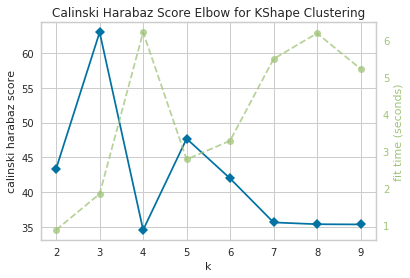

In [16]:
# using library (http://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

# Instantiate the clustering model and visualizer
model = KShape(random_state=seed,max_iter=max_iter)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabaz')

visualizer.fit(weekday_X_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
